# Ван Чэнь M08


Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)
-  Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
-  Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
-  При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
-  Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
-  Замерить время обучения каждой модели для каждой стратегии.
-  Для оценки качества моделей используйте метрику **AUC-ROC**.
-  Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
-  * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
-  * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

In [61]:
!wget -O simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2023-12-10 17:03:41--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 172.67.129.58, 104.21.1.127, 2606:4700:3037::6815:17f, ...
Connecting to www.wfonts.com (www.wfonts.com)|172.67.129.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘simhei.ttf’

simhei.ttf          100%[===================>]   9.58M  2.13MB/s    in 4.8s    

2023-12-10 17:03:46 (2.01 MB/s) - ‘simhei.ttf’ saved [10050870/10050870]



# **EDA**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate
from sklearn.multioutput import ClassifierChain
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

import warnings
warnings.filterwarnings('ignore')
from matplotlib.font_manager import fontManager
font_path = 'simhei.ttf'
font_prop = fontManager.addfont(font_path)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [63]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',encoding='gbk')

**описание данных**

ID человека: идентификатор для каждого человека.

Пол: пол человека (мужской/женский).

Возраст: возраст человека в годах.

Род занятий: род занятий или профессия человека.

Продолжительность сна (часы): количество часов, которое человек спит в сутки.

Качество сна (шкала: 1-10): субъективная оценка качества сна в диапазоне от 1 до 10.

Уровень физической активности (минуты/день): количество минут в день, в течение которых человек физически активен.

Уровень стресса (шкала: 1-10): субъективная оценка уровня стресса, который испытывает человек, в диапазоне от 1 до 10.

Категория ИМТ: категория индекса массы тела человека (например, недостаточный вес, нормальный вес, избыточный вес).

Артериальное давление (систолическое/диастолическое): измерение артериального давления человека, выраженное как систолическое/диастолическое.

Частота сердечных сокращений (bpm): частота сердечных сокращений человека в состоянии покоя, выраженная в ударах в минуту.

Ежедневные шаги: количество шагов, которые человек делает каждый день.

целевая:**Расстройство сна: есть ли у человека расстройство сна (нет, бессонница, апноэ сна).**

Person ID（个人ID）:每个人的标识符。

Gender（性别）:人的性别(男/女)。

Age（年龄）:以年为单位的人的年龄。

Occupation（职业）:人的职业或专业。

Sleep Duration (hours)（睡眠持续时间(小时)）:人每天睡眠的小时数。

Quality of Sleep (scale: 1-10)（睡眠质量(等级:1-10):对睡眠质量的主观评价，范围从1到10。

Physical Activity Level (minutes/day)（身体活动水平(分钟/天)）:个人每天从事身体活动的分钟数。

Stress Level (scale: 1-10)（压力水平(等级:1-10)）:对人所经历的压力水平的主观评级，范围从1到10。

BMI Category（身体质量指数类别）:个人的身体质量指数类别(例如，体重不足、正常、超重)。

Blood Pressure (systolic/diastolic)（血压(收缩压/舒张压)）:个人的血压测量值，表示为收缩压/舒张压。

Heart Rate (bpm)（心率(bpm)）:人的静息心率，单位为每分钟心跳数。

Daily Steps（每日步数）:此人每天走的步数。

Sleep Disorder（睡眠障碍）:人是否存在睡眠障碍(无、失眠、睡眠呼吸暂停)。


数据可在这里[找到](https://github.com/chenstar1/ml_course/blob/main/task/data/Sleep_health_and_lifestyle_dataset.csv)

Данные можно найти [здесь](https://github.com/chenstar1/ml_course/blob/main/task/data/Sleep_health_and_lifestyle_dataset.csv)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      374 non-null    int64  
 1   性别      374 non-null    object 
 2   年龄      374 non-null    int64  
 3   职业      374 non-null    object 
 4   睡眠时长    374 non-null    float64
 5   睡眠质量    374 non-null    int64  
 6   身体活动水平  374 non-null    int64  
 7   压力水平    374 non-null    int64  
 8   BMI     374 non-null    object 
 9   血压      374 non-null    object 
 10  心率      374 non-null    int64  
 11  每日步数    374 non-null    int64  
 12  睡眠障碍    374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [65]:
df.describe()

,ID,年龄,睡眠时长,睡眠质量,身体活动水平,压力水平,心率,每日步数
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


<Axes: >

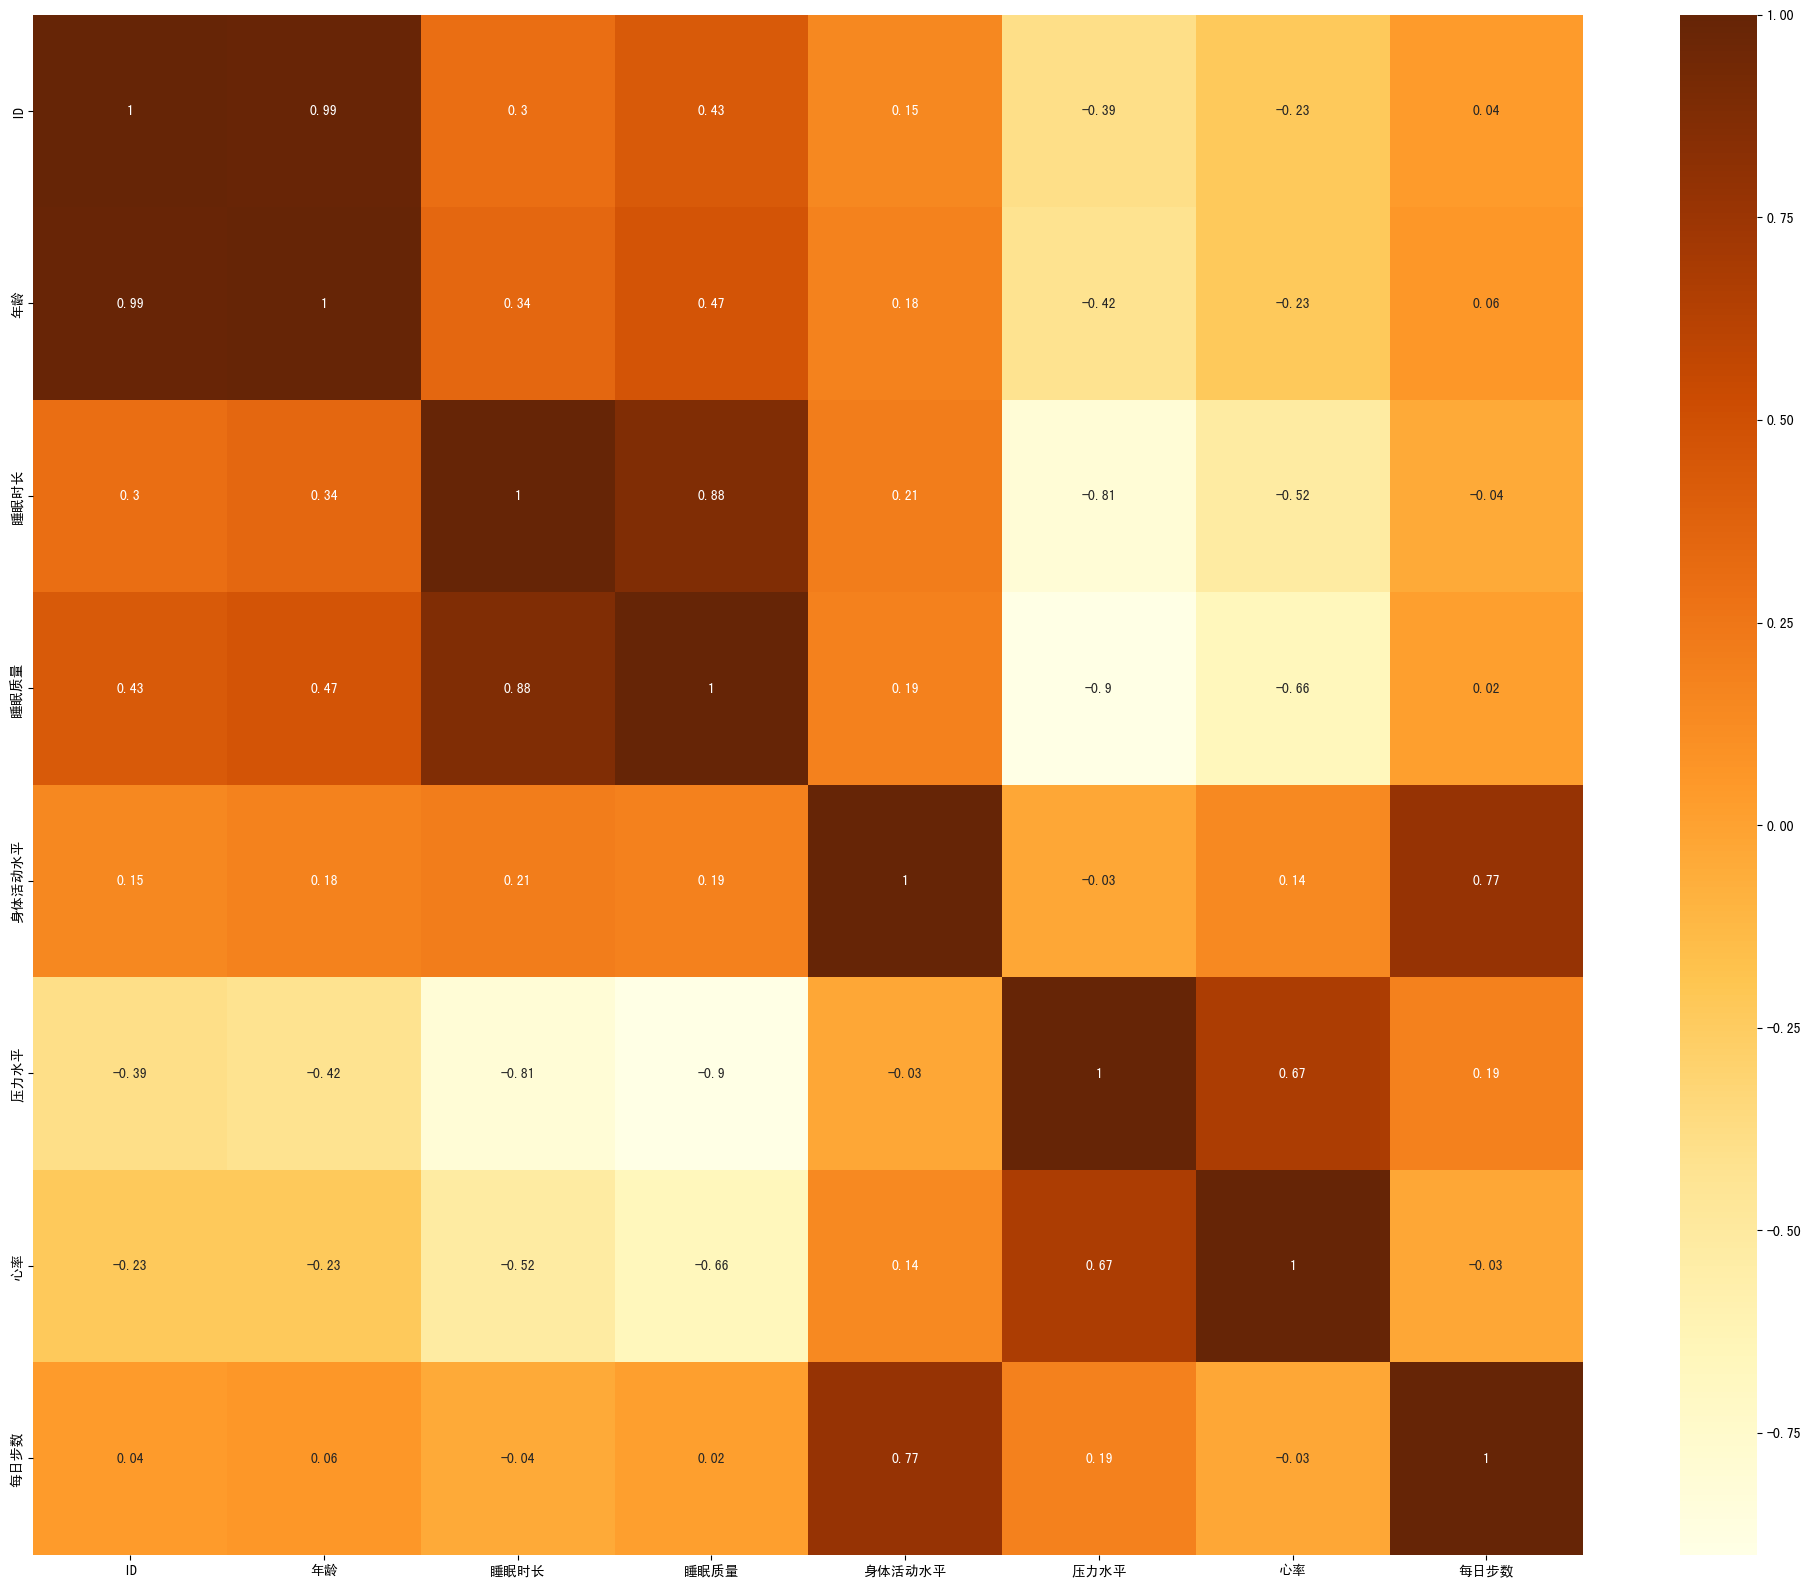

In [66]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

<Axes: title={'center': '睡眠障碍变量'}, xlabel='睡眠障碍', ylabel='count'>

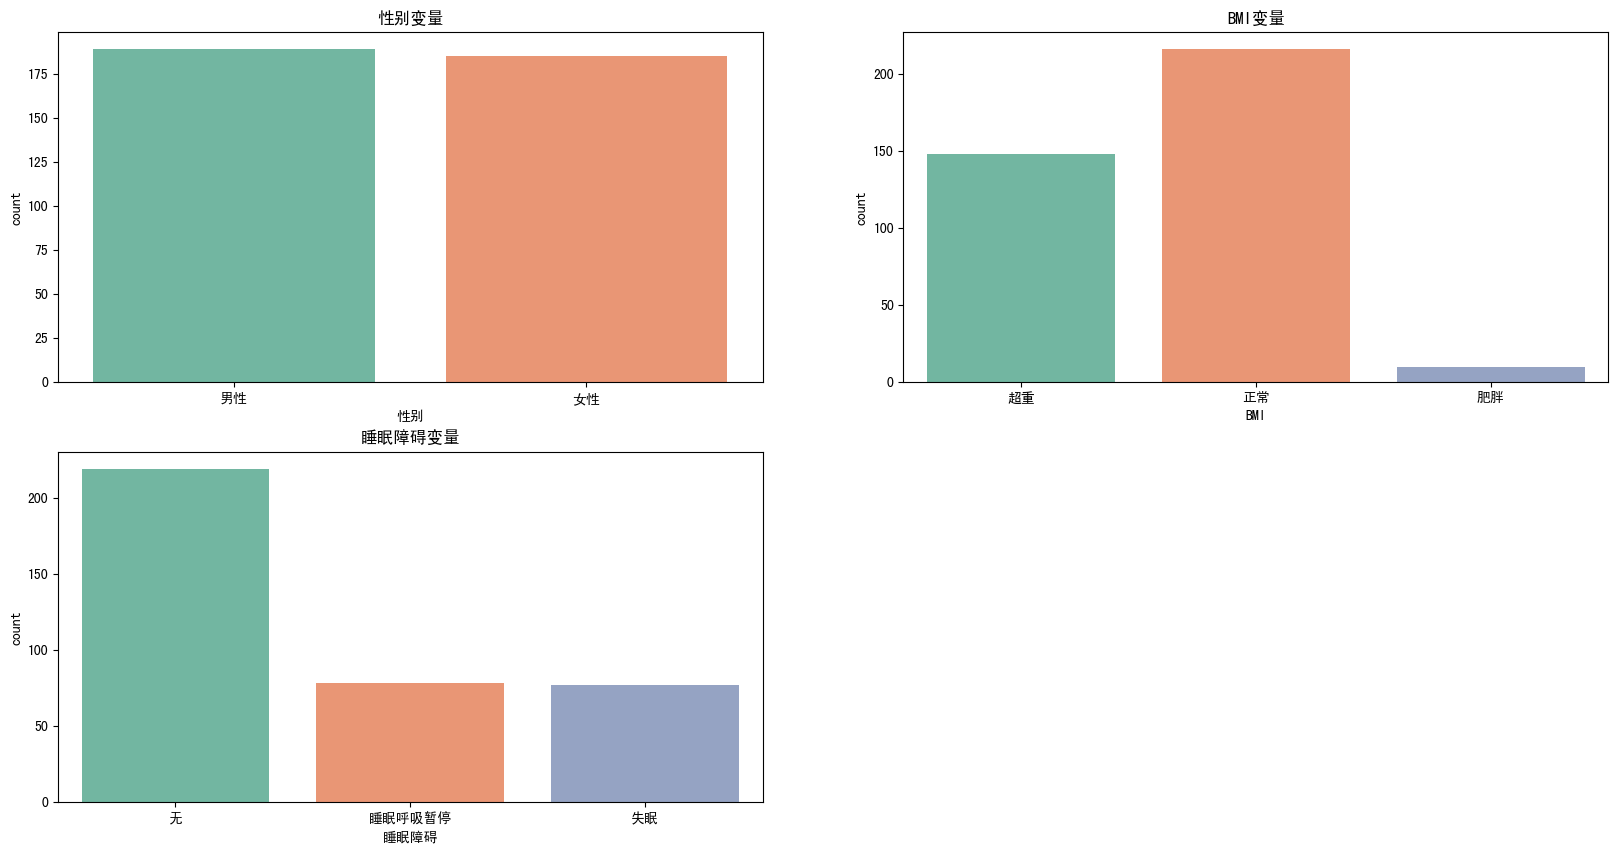

In [67]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('性别变量')
sns.countplot(x = '性别', palette = 'Set2', data = df)

plt.subplot(2, 2, 2)
plt.gca().set_title('BMI变量')
sns.countplot(x = 'BMI', palette = 'Set2', data = df)

plt.subplot(2, 2, 3)
plt.gca().set_title('睡眠障碍变量')
sns.countplot(x = '睡眠障碍', palette = 'Set2', data = df)


<Axes: xlabel='每日步数', ylabel='Count'>

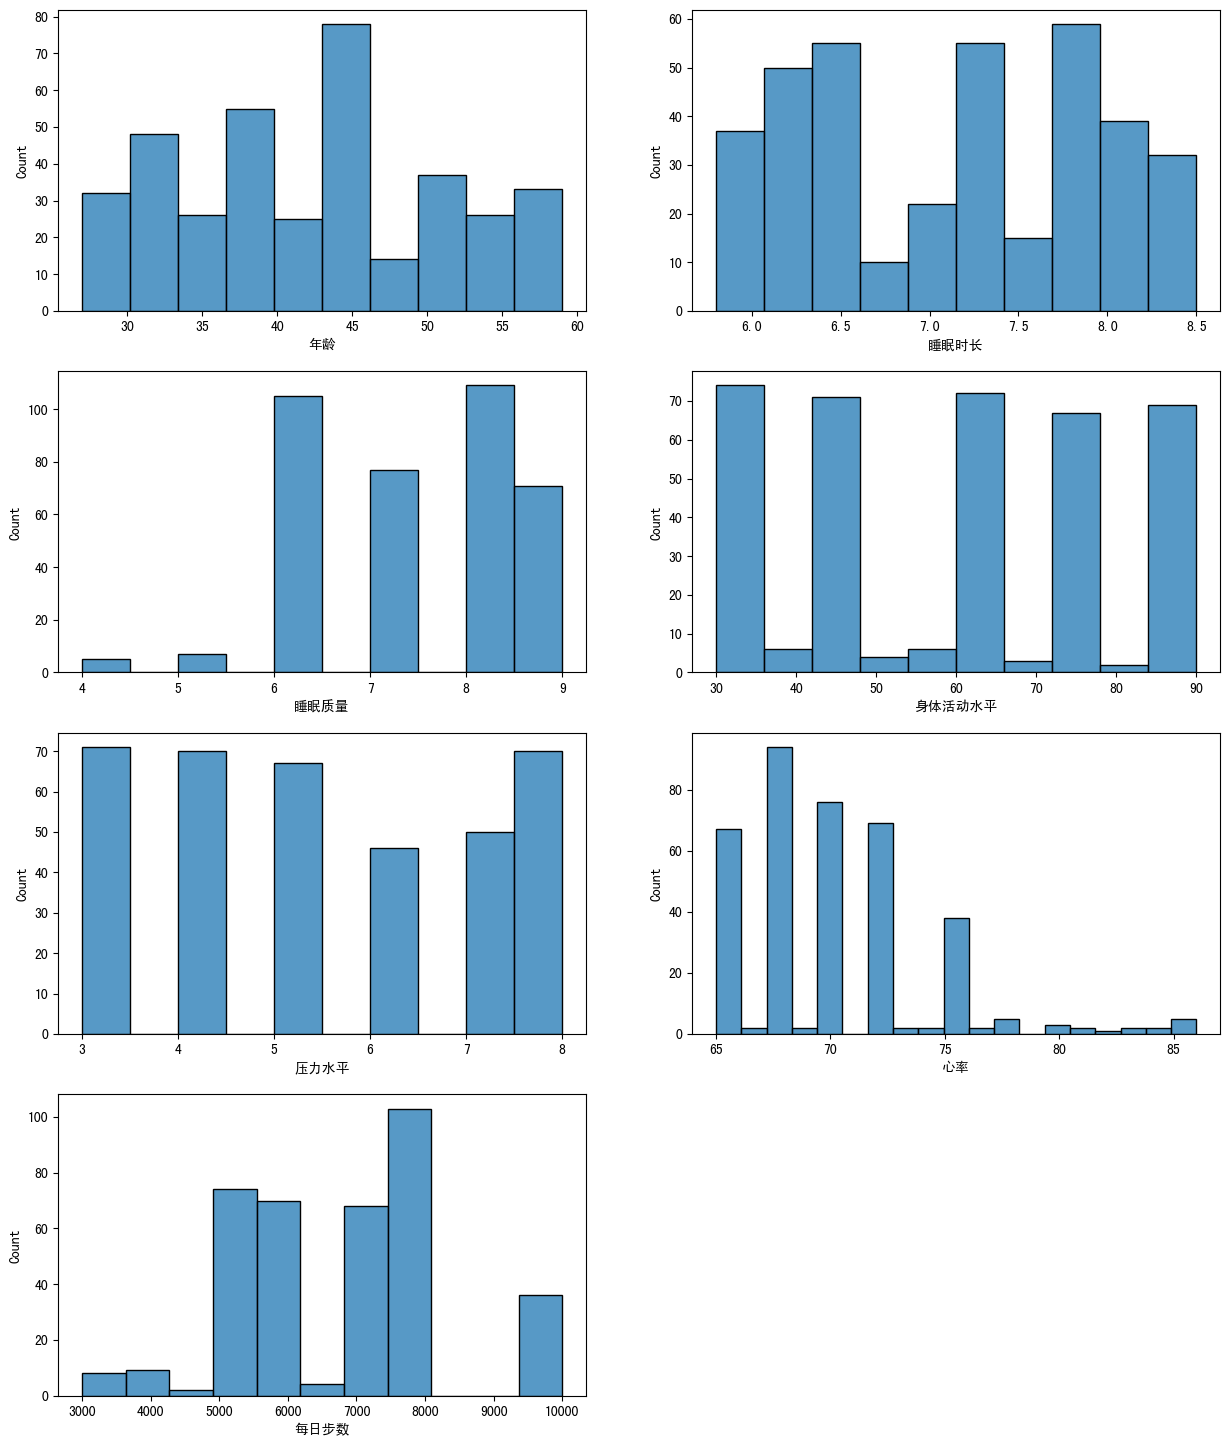

In [68]:
plt.figure(figsize = (15, 18))

plt.subplot(4, 2, 1)
sns.histplot(x = df['年龄'], kde = False)

plt.subplot(4, 2, 2)
sns.histplot(x = df['睡眠时长'], kde = False)

plt.subplot(4, 2, 3)
sns.histplot(x = df['睡眠质量'], kde = False)

plt.subplot(4, 2, 4)
sns.histplot(x = df['身体活动水平'], kde = False)

plt.subplot(4, 2, 5)
sns.histplot(x = df['压力水平'], kde = False)

plt.subplot(4, 2, 6)
sns.histplot(x = df['心率'], kde = False)

plt.subplot(4, 2, 7)
sns.histplot(x = df['每日步数'], kde = False)


<Axes: title={'center': '年龄图/возраст'}, xlabel='年龄'>

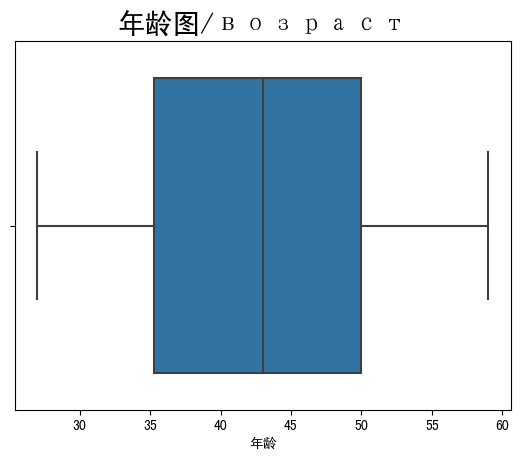

In [69]:
plt.title("年龄图/возраст", fontdict = {'fontsize': 20})
sns.boxplot(x=df["年龄"])

<Axes: title={'center': '睡眠时长图/продолжительности сна'}, xlabel='睡眠时长'>

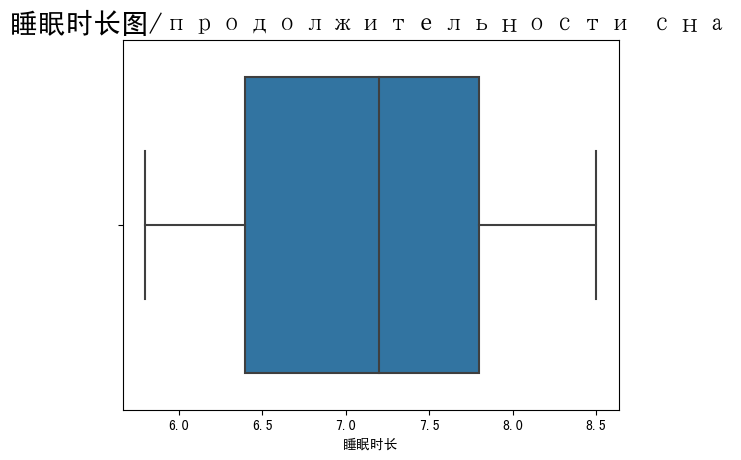

In [70]:
plt.title("睡眠时长图/продолжительности сна", fontdict = {'fontsize': 20})
sns.boxplot(x=df["睡眠时长"])

<Axes: title={'center': '睡眠质量图/ качества сна'}, xlabel='睡眠质量'>

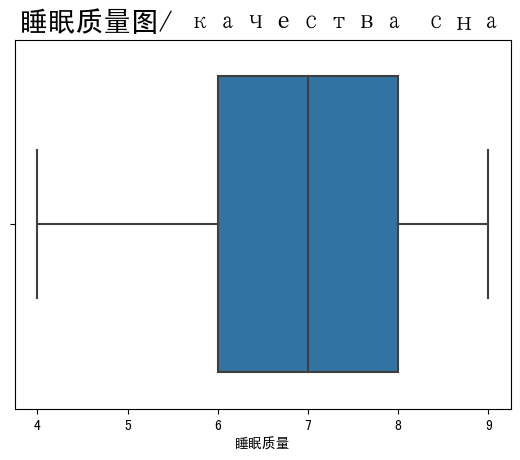

In [71]:
plt.title("睡眠质量图/ качества сна", fontdict = {'fontsize': 20})
sns.boxplot(x=df['睡眠质量'])

<Axes: title={'center': '身体活动水平/Уровень физической активности'}, xlabel='身体活动水平'>

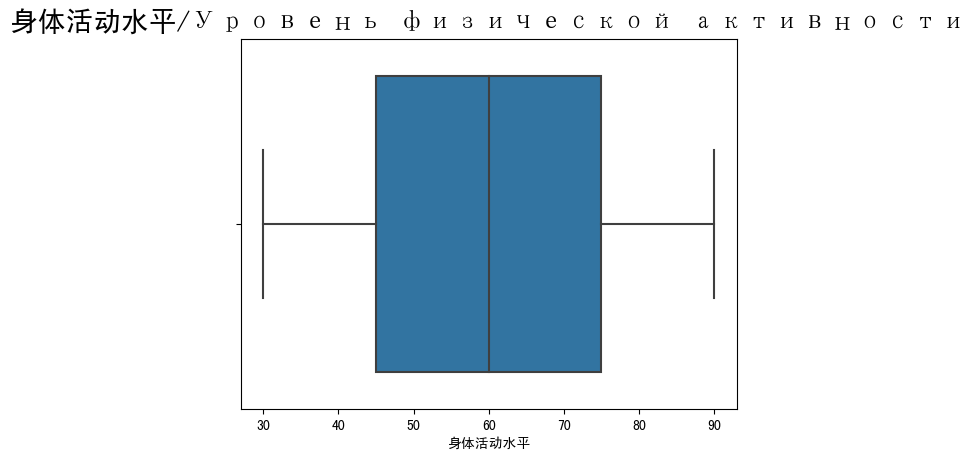

In [72]:
plt.title("身体活动水平/Уровень физической активности", fontdict = {'fontsize': 20})
sns.boxplot(x=df["身体活动水平"])

<Axes: title={'center': '压力图/штаммы'}, xlabel='压力水平'>

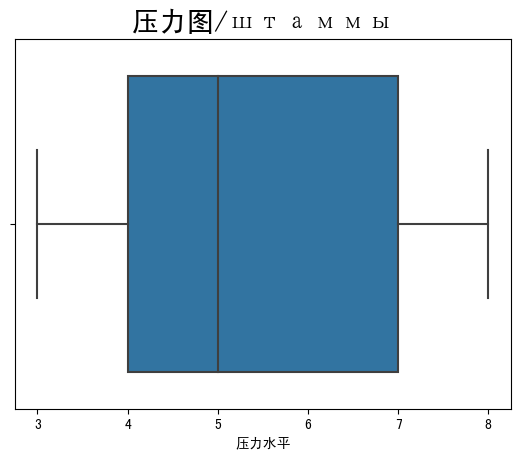

In [73]:
plt.title("压力图/штаммы", fontdict = {'fontsize': 20})
sns.boxplot(x=df["压力水平"])

<Axes: title={'center': '心率图/ частоты сердечных сокращений'}, xlabel='心率'>

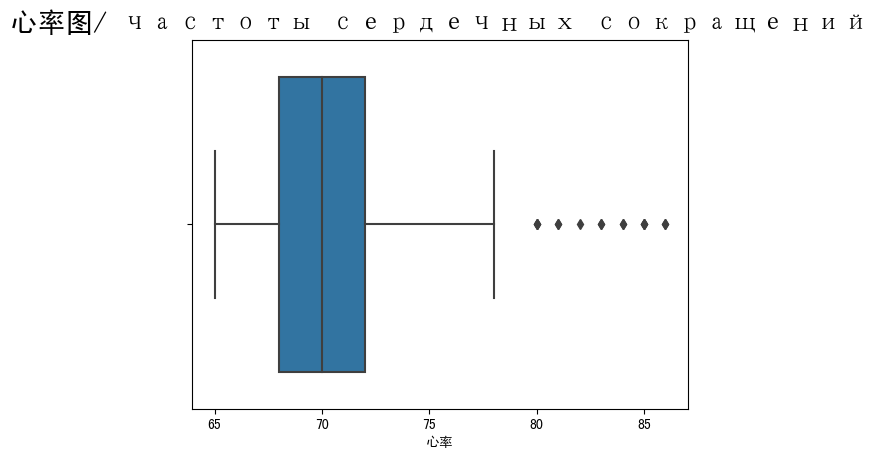

In [74]:
plt.title("心率图/ частоты сердечных сокращений", fontdict = {'fontsize': 20})
sns.boxplot(x=df["心率"])

<Axes: title={'center': 'BMI'}, xlabel='BMI', ylabel='count'>

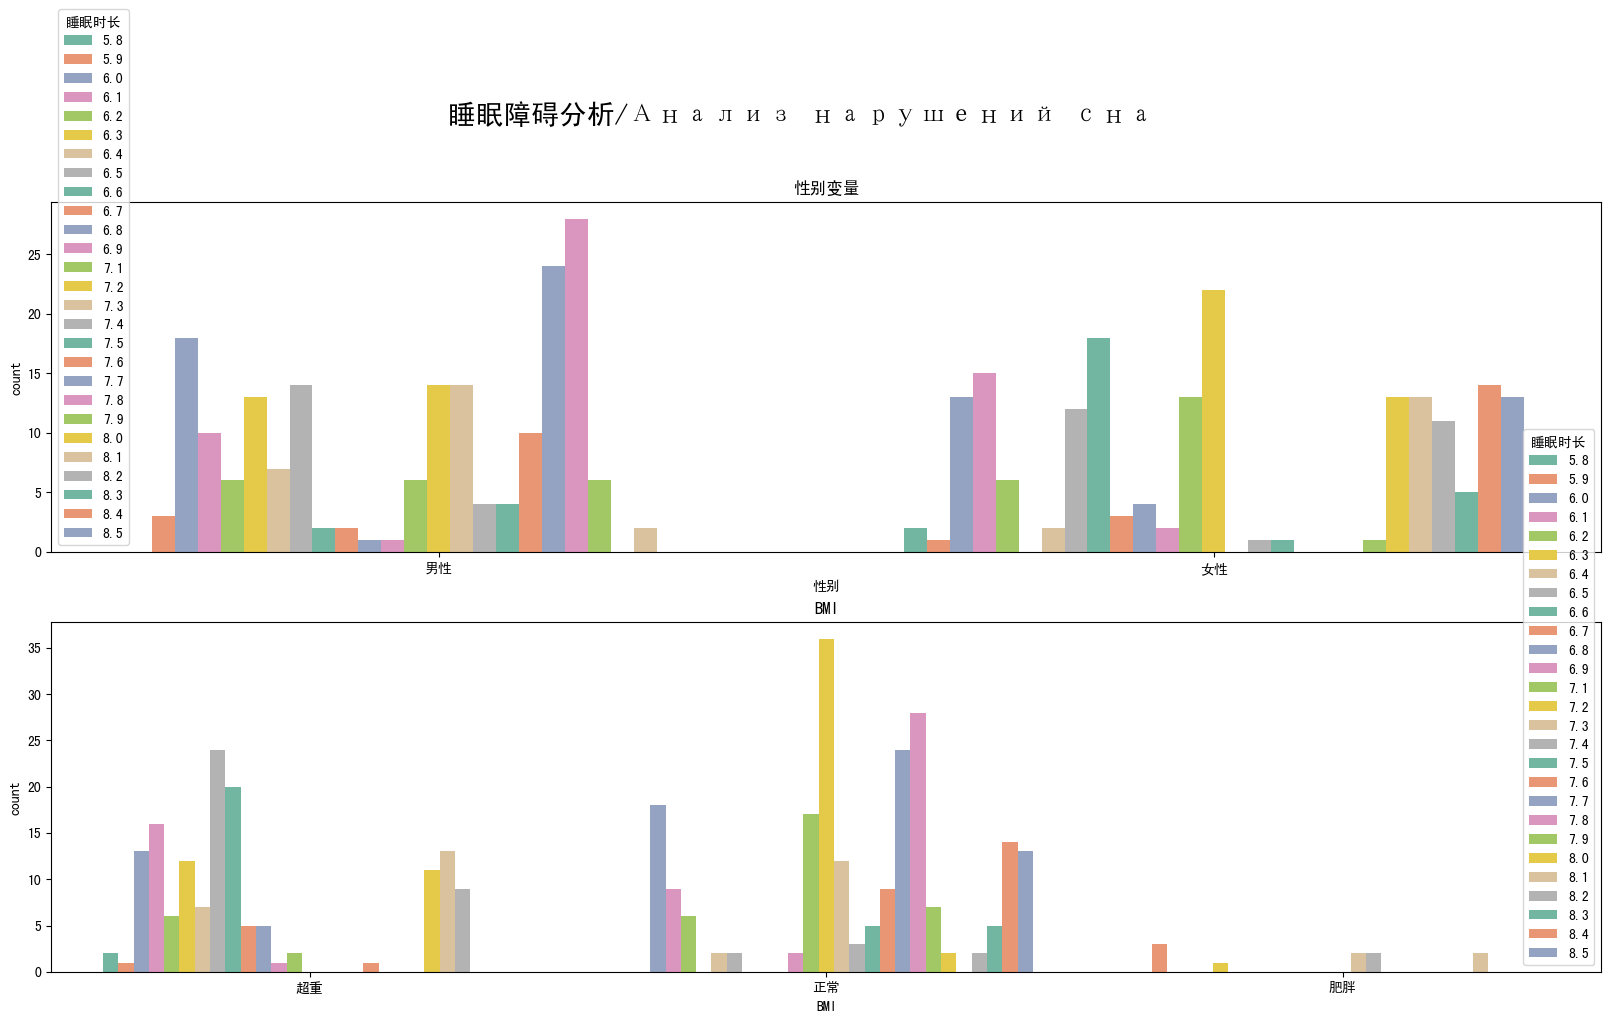

In [75]:
plt.figure(figsize = (20, 10))
plt.suptitle("睡眠障碍分析/Анализ нарушений сна",fontweight="bold", fontsize=20)

plt.subplot(2, 1, 1)
plt.gca().set_title('性别变量')
sns.countplot(x = '性别', hue = '睡眠时长', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('BMI')
sns.countplot(x = 'BMI', hue = '睡眠时长', palette = 'Set2', data = df)


<Axes: title={'center': '血压分析'}, xlabel='血压', ylabel='count'>

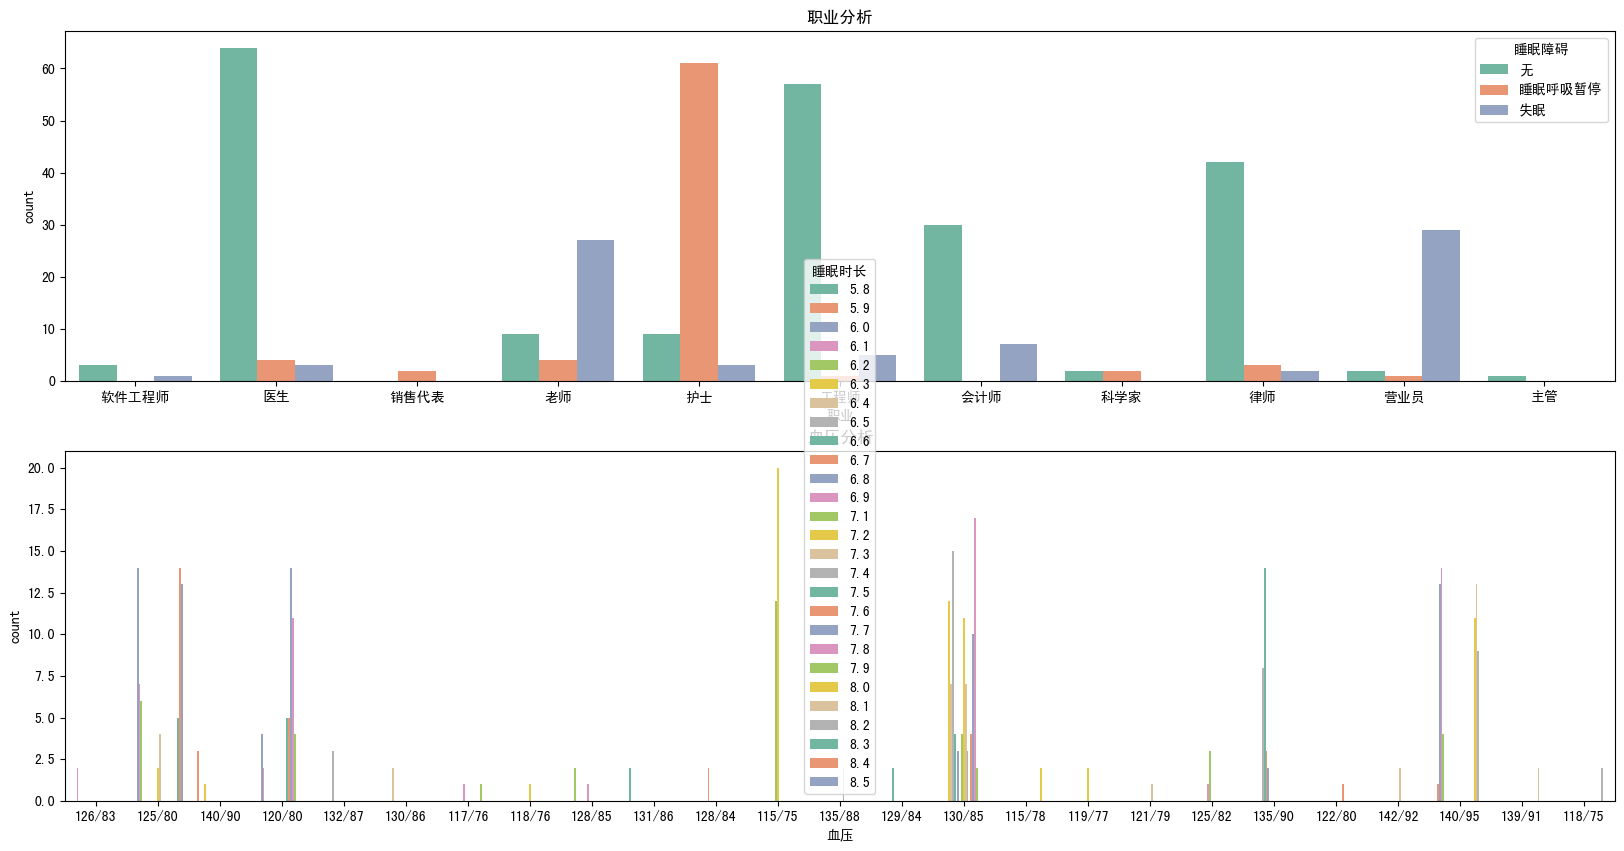

In [76]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('职业分析')
sns.countplot(x = '职业', hue = '睡眠障碍', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('血压分析')
sns.countplot(x = '血压', hue = '睡眠时长', palette = 'Set2', data = df)


<Axes: xlabel='睡眠障碍', ylabel='每日步数'>

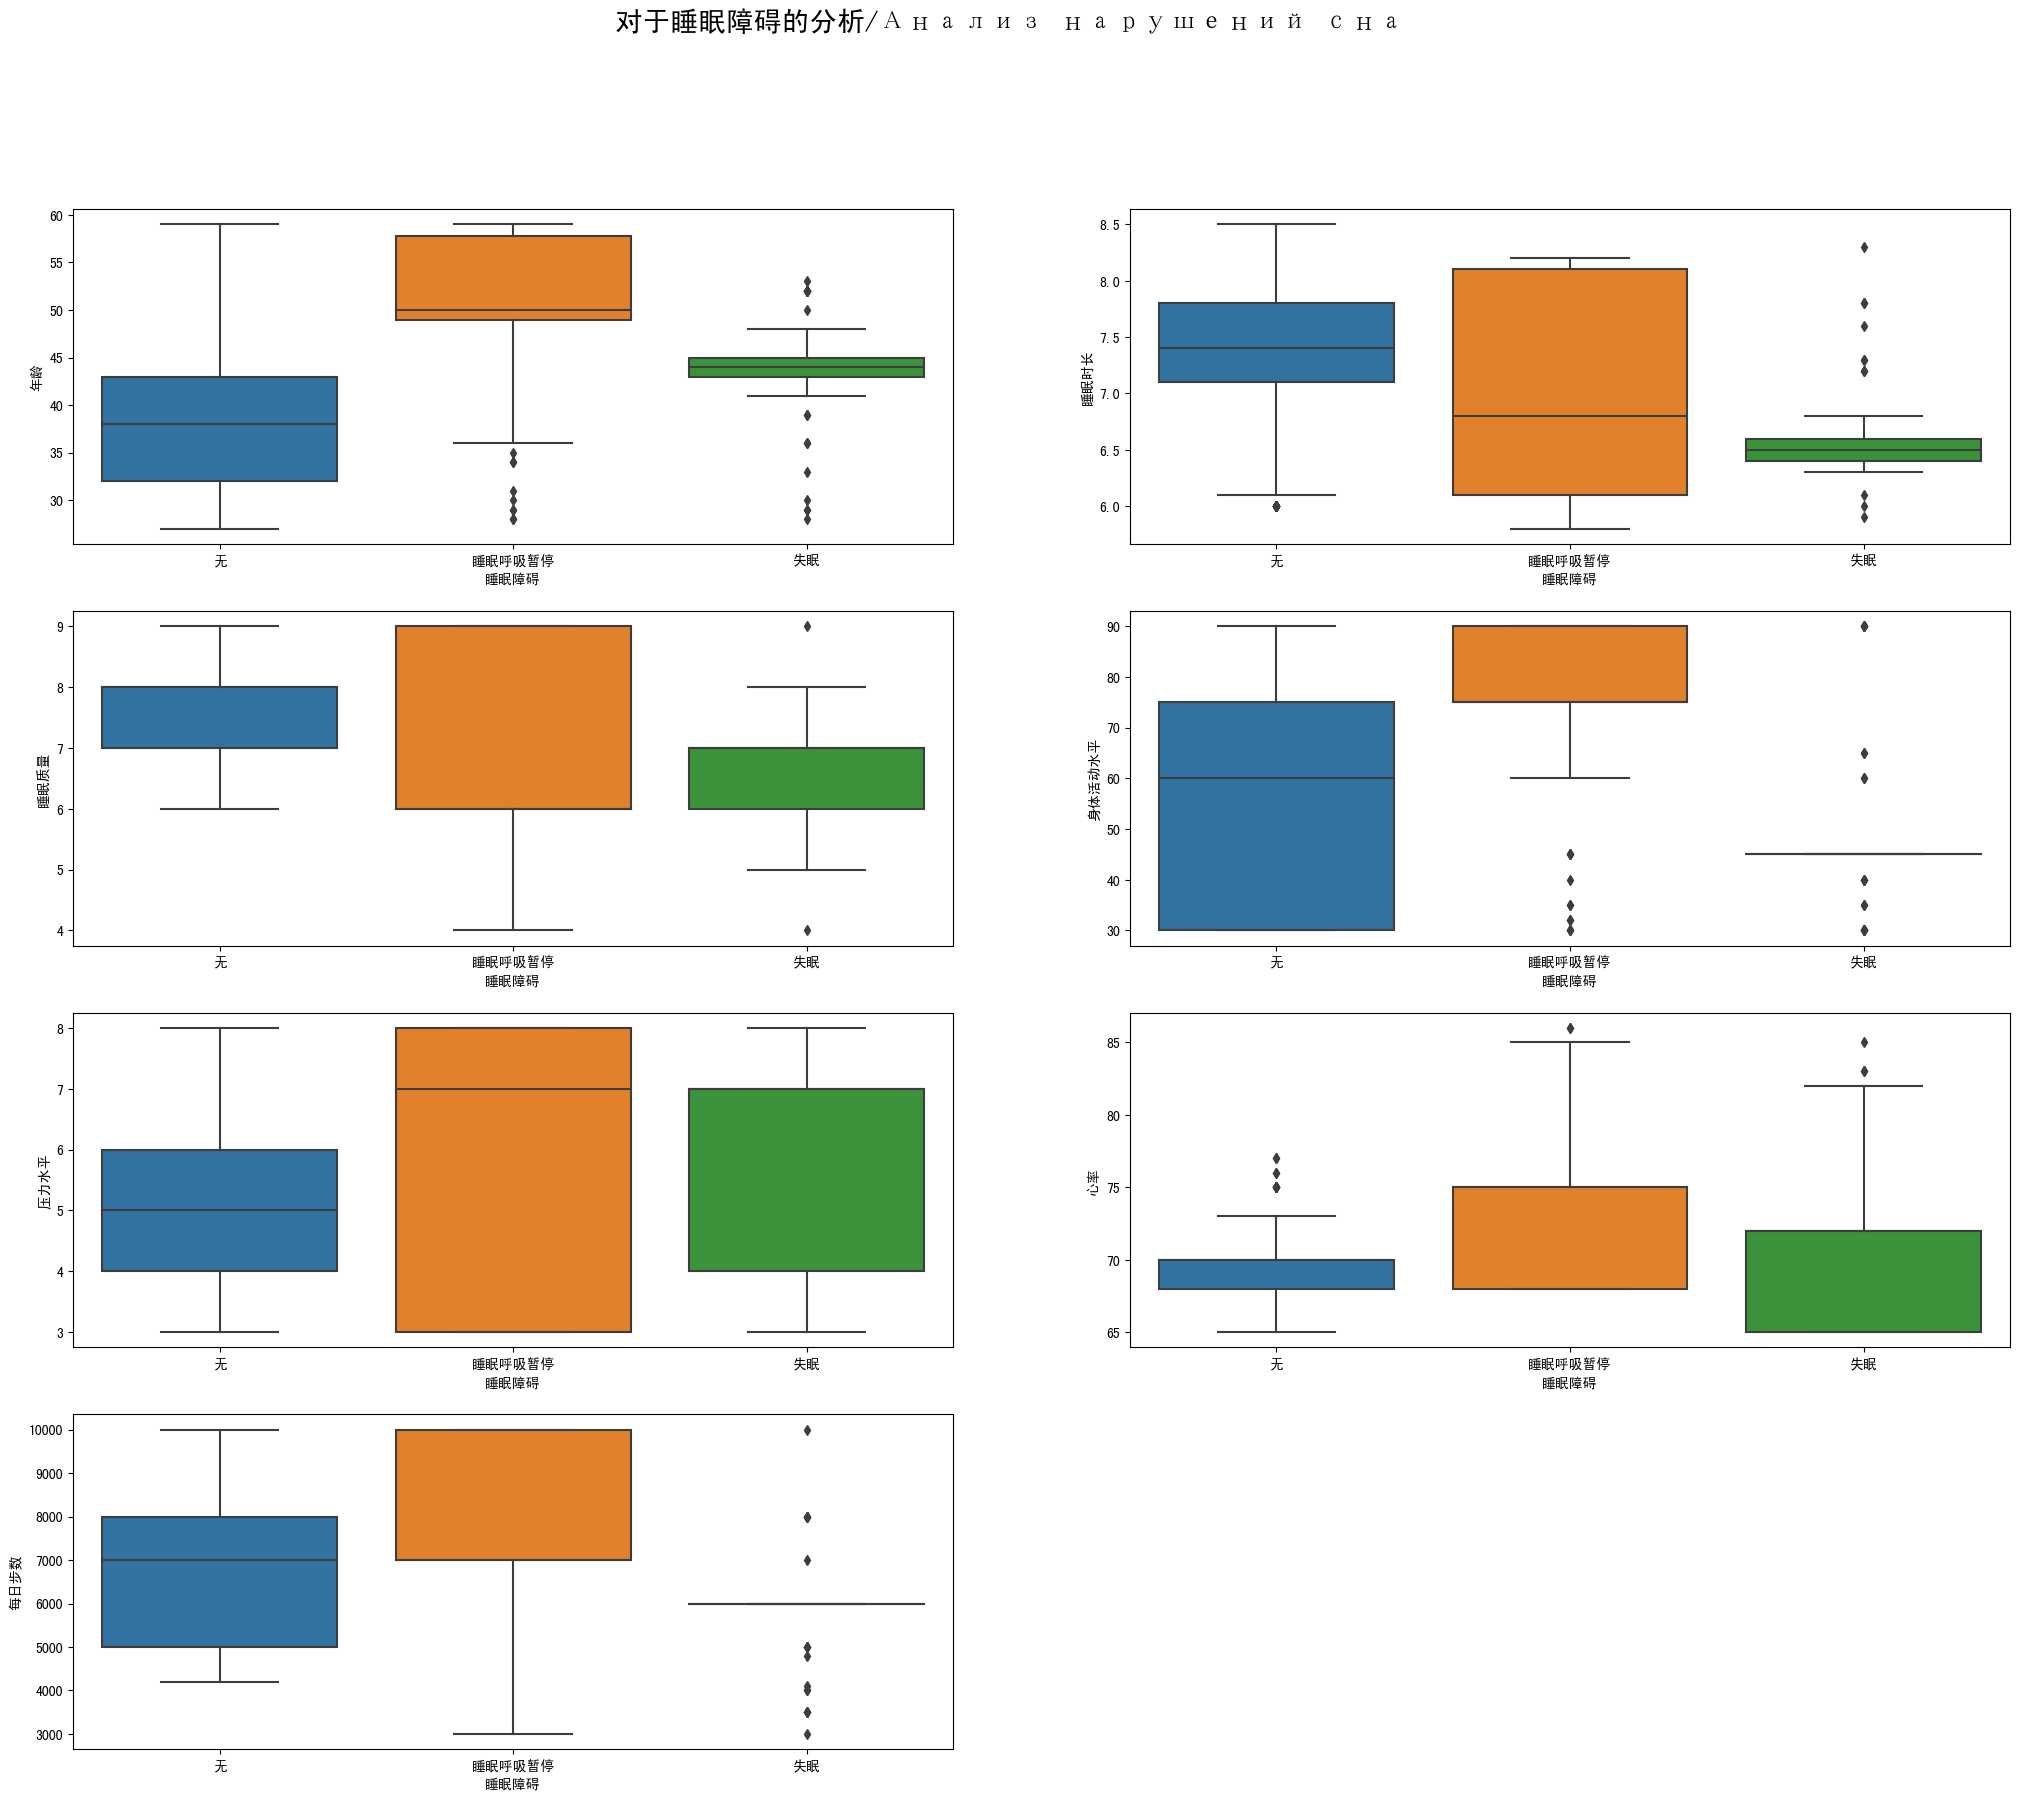

In [77]:
plt.figure(figsize = (25, 20))
plt.suptitle("对于睡眠障碍的分析/Анализ нарушений сна",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="睡眠障碍", y="年龄", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="睡眠障碍", y="睡眠时长", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="睡眠障碍", y="睡眠质量", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="睡眠障碍", y="身体活动水平", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="睡眠障碍", y="压力水平", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="睡眠障碍", y="心率", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="睡眠障碍", y="每日步数", data=df)


# **Feature Engineering**

In [78]:
df = df.drop('ID', axis = 1)

In [79]:
hot = pd.get_dummies(df[['性别', '职业', 'BMI', '血压']])
df = pd.concat([df, hot], axis = 1)
df.loc[df['睡眠障碍'] == '无','睡眠障碍'] = '0'
df.loc[df['睡眠障碍'] == '失眠','睡眠障碍'] = '1'
df.loc[df['睡眠障碍'] == '睡眠呼吸暂停','睡眠障碍'] = '2'

df = df.drop(['性别', '职业', 'BMI', '血压'], axis = 1)


In [80]:
X = df.drop('睡眠障碍', axis = 1)
X = X.values
y = df['睡眠障碍']

**масштабирование данных**

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [82]:

train_data,test_data, train_target, test_target = train_test_split(X_standard, y, test_size = 0.25)


**Выбор**

In [83]:
selector1 = RFECV(LogisticRegression(), step=1, cv=5)
selector1 = selector1.fit(train_data, train_target)
X = df.drop('睡眠障碍', axis = 1)
train_data_pd = pd.DataFrame(train_data, columns=X.columns)
features_rfecv=list(train_data_pd.columns[selector1.support_])
print("最好的特征排序: %s" % selector1.ranking_)
print("最好的特征 : " , features_rfecv)

最好的特征排序: [ 1  1 18  1 17  1  1  1  1 20  1  1  1  2  1  8  1  1 14  1  1  1  1  7
 10 13 12 16  6  1 15  9  4  1  1  5  1  1  1 19  1  1  3  1 11  1  1  1]
最好的特征 :  ['年龄', '睡眠时长', '身体活动水平', '心率', '每日步数', '性别_女性', '性别_男性', '职业_会计师', '职业_医生', '职业_工程师', '职业_护士', '职业_老师', '职业_营业员', '职业_销售代表', 'BMI_正常', 'BMI_肥胖', 'BMI_超重', '血压_120/80', '血压_125/82', '血压_126/83', '血压_128/85', '血压_129/84', '血压_130/85', '血压_131/86', '血压_132/87', '血压_135/90', '血压_140/90', '血压_140/95', '血压_142/92']


In [84]:
train_data=train_data_pd[features_rfecv]
test_data_pd = pd.DataFrame(test_data, columns=X.columns)
test_data=test_data_pd[features_rfecv]
train_data.head()
test_data.head()

,年龄,睡眠时长,身体活动水平,心率,每日步数,性别_女性,性别_男性,职业_会计师,职业_医生,职业_工程师,...,血压_126/83,血压_128/85,血压_129/84,血压_130/85,血压_131/86,血压_132/87,血压_135/90,血压_140/90,血压_140/95,血压_142/92
0,-0.598565,0.085471,0.039844,-0.524383,0.113356,1.010753,-1.010753,3.017964,-0.484070,-0.45008,...,-0.073324,-0.089924,-0.073324,-0.6,-0.073324,-0.089924,-0.278944,-0.103975,-0.458646,-0.073324
1,-1.060377,-1.298887,-1.402260,0.444107,-1.124458,-0.989361,0.989361,-0.331349,2.065818,-0.45008,...,-0.073324,-0.089924,-0.073324,-0.6,-0.073324,-0.089924,-0.278944,-0.103975,-0.458646,-0.073324
2,-1.175831,-1.424738,-1.402260,0.444107,-1.124458,-0.989361,0.989361,-0.331349,2.065818,-0.45008,...,-0.073324,-0.089924,-0.073324,-0.6,-0.073324,-0.089924,-0.278944,-0.103975,-0.458646,-0.073324
3,0.325059,-0.795484,-0.681208,-1.250750,-0.505551,1.010753,-1.010753,-0.331349,-0.484070,-0.45008,...,-0.073324,-0.089924,-0.073324,-0.6,-0.073324,-0.089924,3.584948,-0.103975,-0.458646,-0.073324
4,-0.598565,0.085471,0.039844,-0.524383,0.113356,1.010753,-1.010753,3.017964,-0.484070,-0.45008,...,-0.073324,-0.089924,-0.073324,-0.6,-0.073324,-0.089924,-0.278944,-0.103975,-0.458646,-0.073324


**настройка гиперпараметров**

In [85]:

log_reg= LogisticRegression()


param_test =  { 'C':[0.01,0.1,1.0,10,100],
                'class_weight':[None,'balanced']}
log_gv =  GridSearchCV(log_reg,param_grid=param_test,cv=StratifiedKFold(5),verbose=51,n_jobs=-1,scoring="roc_auc_ovr", error_score="raise")
log_gv.fit(train_data,train_target)

# 最优模型参数
print(log_gv.best_params_)

best_c_log=log_gv.best_params_['C']
best_class_weight=log_gv.best_params_['class_weight']






Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 0.01, 'class_weight': None}


In [86]:
knn =  KNeighborsClassifier()

param_test =  [
    {'n_neighbors':[i for i in range(1,21)],
    'weights':['uniform'],
    'p':[i for i in range(1,6)]},

    {'n_neighbors':[i for i in range(1,21)],
    'weights':['distance'],
    'p':[i for i in range(1,6)]}
]
knn_gv = GridSearchCV(knn,param_grid=param_test,cv=StratifiedKFold(5),verbose=51,n_jobs=-1,scoring="roc_auc_ovr", error_score="raise")
knn_gv.fit(train_data,train_target)


print(knn_gv.best_params_)

best_n_neighbors=knn_gv.best_params_['n_neighbors']
best_p=knn_gv.best_params_['p']
best_weights=knn_gv.best_params_['weights']



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [87]:

tree = DecisionTreeClassifier()
param_test={'max_features':['auto','sqrt','log2'],
            'min_samples_split':list(range(2,10)),
            'min_samples_leaf':list(range(1,10)),
            'criterion':["gini", "entropy", "log_loss"],
            'splitter':["best", "random"],
}
tree_gv = GridSearchCV(tree,param_grid=param_test,cv=StratifiedKFold(5),n_jobs=-1,scoring="roc_auc_ovr", error_score="raise")
tree_gv.fit(train_data,train_target)


print(tree_gv.best_params_)
best_max_features=tree_gv.best_params_['max_features']
best_min_samples_split=tree_gv.best_params_['min_samples_split']
best_min_samples_leaf=tree_gv.best_params_['min_samples_leaf']
best_criterion =tree_gv.best_params_['criterion']
best_splitter=tree_gv.best_params_['splitter']





{'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'best'}


In [88]:

param_test = {"kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1],
        "C": [0.1, 0.25, 0.5, 0.75, 1, 2]
             }
svm_gv = GridSearchCV(SVC(random_state=19,probability=True), cv=StratifiedKFold(5),param_grid=param_test,verbose=5, n_jobs=-1,scoring="roc_auc_ovr", error_score="raise")
svm_gv.fit(train_data, train_target)
print(svm_gv.best_params_)
best_c=svm_gv.best_params_['C']
best_gamma=svm_gv.best_params_['gamma']
best_kernel=svm_gv.best_params_['kernel']


Fitting 5 folds for each of 84 candidates, totalling 420 fits
{'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [89]:
param_test =  {"var_smoothing":np.logspace(0, -9, num=100)}

gb_gv = GridSearchCV(GaussianNB(), cv=StratifiedKFold(5),param_grid=param_test,n_jobs=-1,scoring="roc_auc_ovr", error_score="raise")

gb_gv.fit(train_data, train_target)
print(gb_gv.best_params_)

best_var_smoothing=gb_gv.best_params_["var_smoothing"]

{'var_smoothing': 1.0}


# **Начните обучение модели**

**OnevsRest**

In [90]:
accuracies = {}
times = {}
ovr_log = OneVsRestClassifier(LogisticRegression(C=best_c_log)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovr_log.predict(test_data))
time = cross_validate(ovr_log, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovr_log"] = accuracy
times["ovr_log"] = time

print(f"accuracy {accuracy}")
print(f"time {time}")

accuracy 0.8723404255319149
time 0.01495046615600586


In [91]:
ovr_svm = OneVsRestClassifier(SVC(kernel=best_kernel, C=best_c, gamma=best_gamma, random_state=19, probability=True)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovr_svm.predict(test_data))
time = cross_validate(ovr_svm , train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovr_svm"] = accuracy
times["ovr_svm"] = time

print(f" accuracy {accuracy}")
print(f" time {time}")

 accuracy 0.8829787234042553
 time 0.025371313095092773


In [92]:
ovr_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=best_n_neighbors,weights=best_weights,p=best_p)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovr_knn.predict(test_data))
time = cross_validate(ovr_knn, train_data, train_target, cv=5)["fit_time"].mean()
accuracies["ovr_knn"] = accuracy
times["ovr_knn"] = time

print(f"accuracy {accuracy}")
print(f" time {time}")

accuracy 0.8723404255319149
 time 0.016727685928344727


In [93]:
ovr_nb = OneVsRestClassifier(GaussianNB(var_smoothing=best_var_smoothing)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovr_nb.predict(test_data))
time = cross_validate(ovr_nb, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovr_nb"] = accuracy
times["ovr_nb"] = time

print(f"accuracy {accuracy}")
print(f" time {time}")

accuracy 0.8617021276595744
 time 0.008876848220825195


In [94]:
ovr_tree = OneVsRestClassifier(DecisionTreeClassifier(criterion=best_criterion,
     max_features=best_max_features, min_samples_leaf=best_min_samples_leaf,
     min_samples_split=best_min_samples_split, splitter=best_splitter, random_state=19)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovr_tree.predict(test_data))
time = cross_validate(ovr_tree, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovr_tree"] = accuracy
times["ovr_tree"] = time

print(f"accuracy {accuracy}")
print(f"time {time}")

accuracy 0.8829787234042553
time 0.009391164779663086


**OneVsOne**


In [95]:
ovo_log = OneVsOneClassifier(LogisticRegression(C=best_c_log)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovo_log.predict(test_data))
time =cross_validate(ovo_log, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovo_log"] = accuracy
times["ovo_log"] = time

print(f" accuracy {accuracy}")
print(f" time {time}")

 accuracy 0.8617021276595744
 time 0.01254415512084961


In [96]:
ovo_svm = OneVsOneClassifier(SVC(kernel=best_kernel, C=best_c, gamma=best_gamma, random_state=19, probability=True)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovo_svm.predict(test_data))
time = cross_validate(ovo_svm, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovo_svm "] = accuracy
times["ovo_svm "] = time

print(f"accuracy {accuracy}")
print(f"time {time}")

accuracy 0.8829787234042553
time 0.014701557159423829


In [97]:
ovo_knn = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=best_n_neighbors,weights=best_weights,p=best_p)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovo_knn.predict(test_data))
time =cross_validate(ovo_knn, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovo_knn"] = accuracy
times["ovo_knn"] = time

print(f"accuracy {accuracy}")
print(f"time {time}")

accuracy 0.8936170212765957
time 0.005355978012084961


In [98]:
ovo_nb = OneVsOneClassifier(GaussianNB(var_smoothing=best_var_smoothing)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovo_nb.predict(test_data))
time =cross_validate(ovo_nb, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovo_nb"] = accuracy
times["ovo_nb"] = time

print(f" accuracy {accuracy}")
print(f"time {time}")

 accuracy 0.8617021276595744
time 0.005604076385498047


In [99]:
ovo_tree = OneVsOneClassifier(DecisionTreeClassifier(criterion=best_criterion,
     max_features=best_max_features, min_samples_leaf=best_min_samples_leaf,
     min_samples_split=best_min_samples_split, splitter=best_splitter, random_state=19)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, ovo_tree.predict(test_data))
time =cross_validate(ovo_tree, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["ovo_tree"] = accuracy
times["ovo_tree"] = time

print(f"accuracy {accuracy}")
print(f" time {time}")

accuracy 0.8723404255319149
 time 0.005743408203125


**OutPutCode**

In [100]:
op_log = OutputCodeClassifier(LogisticRegression(C=best_c_log)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, op_log.predict(test_data))
time =cross_validate(op_log, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["op_log"] = accuracy
times["op_log"] = time

print(f"accuracy {accuracy}")
print(f" time {time}")

accuracy 0.8617021276595744
 time 0.018227529525756837


In [101]:
op_svm = OutputCodeClassifier(SVC(kernel=best_kernel, C=best_c, gamma=best_gamma, random_state=19, probability=True)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, op_svm.predict(test_data))
time =cross_validate(op_svm, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["op_svm"] = accuracy
times["op_svm"] = time

print(f"accuracy {accuracy}")
print(f"time {time}")

accuracy 0.6808510638297872
time 0.024901533126831056


In [102]:
op_knn =OutputCodeClassifier(KNeighborsClassifier(n_neighbors=best_n_neighbors,weights=best_weights,p=best_p)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, op_knn.predict(test_data))
time =cross_validate(op_knn, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["op_knn"] = accuracy
times["op_knn"] = time

print(f"accuracy {accuracy}")
print(f"time {time}")

accuracy 0.6914893617021277
time 0.012738561630249024


In [103]:
op_nb = OutputCodeClassifier(GaussianNB(var_smoothing=best_var_smoothing)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, op_nb.predict(test_data))
time =cross_validate(op_nb, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["op_nb"] = accuracy
times["op_nb"] = time

print(f" accuracy {accuracy}")
print(f" time {time}")

 accuracy 0.8723404255319149
 time 0.01296992301940918


In [104]:
op_tree = OutputCodeClassifier(DecisionTreeClassifier(criterion=best_criterion,
     max_features=best_max_features, min_samples_leaf=best_min_samples_leaf,
     min_samples_split=best_min_samples_split, splitter=best_splitter, random_state=19)).fit(train_data, train_target)
accuracy = accuracy_score(test_target, op_tree.predict(test_data))
time =cross_validate(op_tree, train_data, train_target, cv=5)["fit_time"].mean()

accuracies["op_tree"] = accuracy
times["op_tree"] = time

print(f" accuracy {accuracy}")
print(f" time {time}")

 accuracy 0.8829787234042553
 time 0.012499713897705078


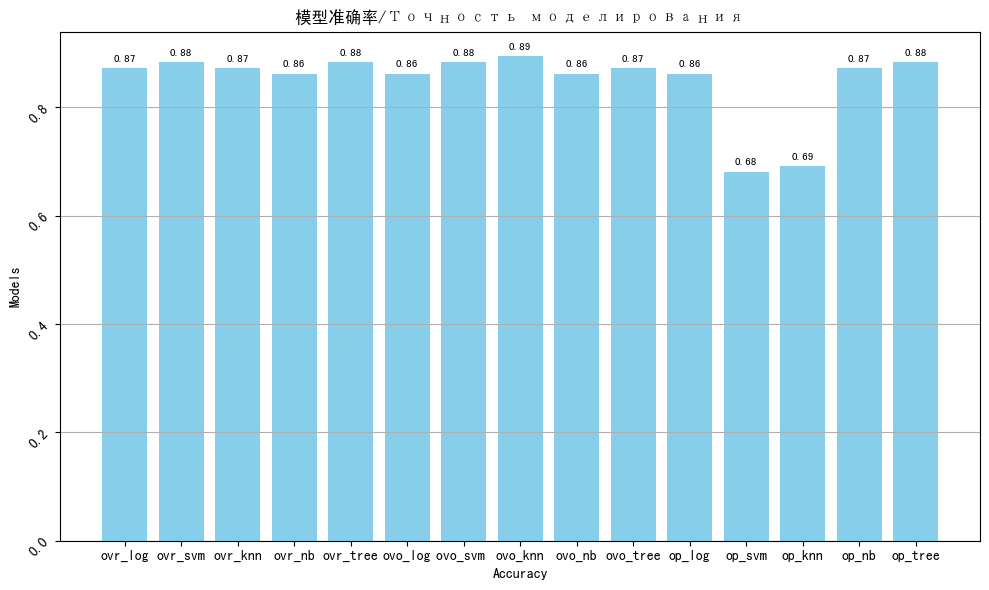

In [105]:
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
plt.title('模型准确率/Точность моделирования')
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.yticks(rotation=45)
plt.bar(model_names, accuracy_values, color='skyblue')
plt.grid(axis='y')

for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


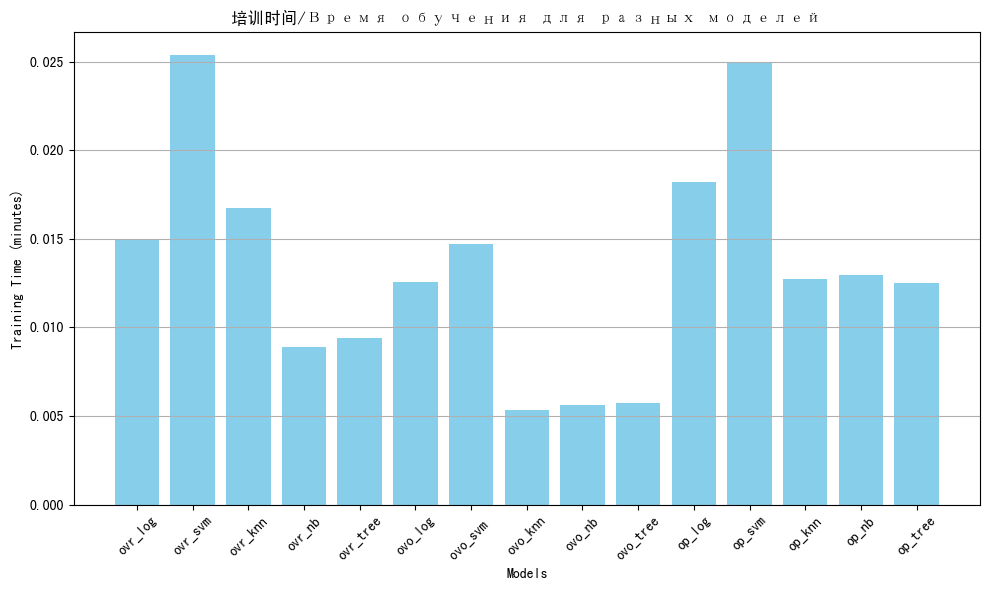

In [106]:
model_names = list(times.keys())
training_times = list(times.values())

plt.figure(figsize=(10, 6))
plt.title('培训时间/Время обучения для разных моделей')
plt.xlabel('Models')
plt.ylabel('Training Time (minutes)')
plt.xticks(rotation=45)
plt.bar(model_names, training_times, color='skyblue')
plt.grid(axis='y')

for i, v in enumerate(training_times):
    plt.text(i, v + 1, str(), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**MultiOutputClassifier**

In [107]:

accuracies_new = {}
time_new = {}
y=y.to_numpy()
y = y.reshape(-1, 1)
train_data, test_data, train_target, test_target = train_test_split(X, y, test_size=0.3, random_state=42)
multi_output_clf_lr = MultiOutputClassifier(LogisticRegression(C=best_c_log))



multi_output_clf_lr .fit(train_data, train_target)


predictions =multi_output_clf_lr.predict(test_data)
accuracy= accuracy_score(test_target, predictions)
times_new =cross_validate(multi_output_clf_lr , train_data, train_target, cv=5)["fit_time"].mean()

accuracies_new["multi_output_clf_lr "] = accuracy
time_new["multi_output_clf_lr"]=time
print(f"Accuracy: {accuracy}")
print(f" time {time}")

print(classification_report(test_target, predictions))

Accuracy: 0.7345132743362832
 time 0.012499713897705078
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        62
           1       0.67      0.08      0.15        24
           2       0.95      0.70      0.81        27

    accuracy                           0.73       113
   macro avg       0.77      0.60      0.59       113
weighted avg       0.75      0.73      0.67       113



In [108]:
multi_output_clf_tree = MultiOutputClassifier(DecisionTreeClassifier(criterion=best_criterion,
     max_features=best_max_features, min_samples_leaf=best_min_samples_leaf,
     min_samples_split=best_min_samples_split, splitter=best_splitter, random_state=19))



multi_output_clf_tree.fit(train_data, train_target)


predictions = multi_output_clf_tree.predict(test_data)


accuracy = accuracy_score(test_target, predictions)
time =cross_validate(multi_output_clf_tree, train_data, train_target, cv=5)["fit_time"].mean()
accuracies_new["multi_output_clf_tree"] = accuracy
time_new["multi_output_clf_tree"]=time
print(f" time {time}")
print(f"Accuracy: {accuracy}")


print(classification_report(test_target, predictions))

 time 0.004584646224975586
Accuracy: 0.8849557522123894
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        62
           1       0.83      0.83      0.83        24
           2       0.87      0.74      0.80        27

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.88      0.88      0.88       113



In [109]:
multi_output_clf_nb = MultiOutputClassifier(GaussianNB(var_smoothing=best_var_smoothing))



multi_output_clf_nb.fit(train_data, train_target)


predictions = multi_output_clf_nb.predict(test_data)


accuracy = accuracy_score(test_target, predictions)
time =cross_validate(multi_output_clf_nb, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["multi_output_clf_nb"] = accuracy
time_new["multi_output_clf_nb"]=time

print(classification_report(test_target, predictions))

Accuracy: 0.5486725663716814
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        62
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        27

    accuracy                           0.55       113
   macro avg       0.18      0.33      0.24       113
weighted avg       0.30      0.55      0.39       113



In [110]:

multi_output_clf_knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=best_n_neighbors,weights=best_weights,p=best_p))



multi_output_clf_knn.fit(train_data, train_target)


predictions = multi_output_clf_knn.predict(test_data)


accuracy = accuracy_score(test_target, predictions)
time =cross_validate(multi_output_clf_knn, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["multi_output_clf_knn"] = accuracy
time_new["multi_output_clf_knn"]=time

print(classification_report(test_target, predictions))

Accuracy: 0.8761061946902655
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.77      0.83      0.80        24
           2       0.90      0.67      0.77        27

    accuracy                           0.88       113
   macro avg       0.86      0.83      0.84       113
weighted avg       0.88      0.88      0.87       113



In [111]:

multi_output_clf_svm = MultiOutputClassifier(SVC(kernel=best_kernel, C=best_c, gamma=best_gamma, random_state=19))



multi_output_clf_svm.fit(train_data, train_target)


predictions = multi_output_clf_svm.predict(test_data)


accuracy = accuracy_score(test_target, predictions)
time =cross_validate(multi_output_clf_svm, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["multi_output_clf_svm"] = accuracy
time_new["multi_output_clf_svm"]=time

print(classification_report(test_target, predictions))

Accuracy: 0.8938053097345132
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.83      0.83      0.83        24
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.88      0.85      0.87       113
weighted avg       0.89      0.89      0.89       113



**ClassifierChain**

In [112]:

chain_classifier_lr = ClassifierChain(LogisticRegression(C=best_c_log))



chain_classifier_lr.fit(train_data, train_target)


predictions = chain_classifier_lr.predict(test_data)
test_target_float = [float(item) for item in test_target]

accuracy = accuracy_score(test_target_float, predictions)
time =cross_validate(chain_classifier_lr, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["chain_classifier_lr"] = accuracy
time_new["chain_classifier_lr"]=time

print(classification_report(test_target_float, predictions))

Accuracy: 0.7345132743362832
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        62
         1.0       0.67      0.08      0.15        24
         2.0       0.95      0.70      0.81        27

    accuracy                           0.73       113
   macro avg       0.77      0.60      0.59       113
weighted avg       0.75      0.73      0.67       113



In [113]:
chain_classifier_tree = ClassifierChain(DecisionTreeClassifier(criterion=best_criterion,
     max_features=best_max_features, min_samples_leaf=best_min_samples_leaf,
     min_samples_split=best_min_samples_split, splitter=best_splitter, random_state=19))



chain_classifier_tree.fit(train_data, train_target)


predictions = chain_classifier_tree.predict(test_data)


accuracy = accuracy_score(test_target_float, predictions)
time =cross_validate(chain_classifier_tree, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["chain_classifier_tree"] = accuracy
time_new["chain_classifier_tree"]=time

print(classification_report(test_target_float, predictions))

Accuracy: 0.8849557522123894
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        62
         1.0       0.83      0.83      0.83        24
         2.0       0.87      0.74      0.80        27

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.88      0.88      0.88       113



In [114]:
chain_classifier_nb = ClassifierChain(GaussianNB(var_smoothing=best_var_smoothing))



chain_classifier_nb.fit(train_data, train_target)


predictions = chain_classifier_nb.predict(test_data)


accuracy = accuracy_score(test_target_float, predictions)
time =cross_validate(chain_classifier_nb, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["chain_classifier_nb"] = accuracy
time_new["chain_classifier_nb"]=time

print(classification_report(test_target_float, predictions))

Accuracy: 0.5486725663716814
              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71        62
         1.0       0.00      0.00      0.00        24
         2.0       0.00      0.00      0.00        27

    accuracy                           0.55       113
   macro avg       0.18      0.33      0.24       113
weighted avg       0.30      0.55      0.39       113



In [115]:
chain_classifier_knn = ClassifierChain(KNeighborsClassifier(n_neighbors=best_n_neighbors,weights=best_weights,p=best_p))



chain_classifier_knn.fit(train_data, train_target)


predictions = chain_classifier_knn.predict(test_data)


accuracy = accuracy_score(test_target_float, predictions)
time =cross_validate(chain_classifier_knn, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["chain_classifier_knn"] = accuracy
time_new["chain_classifier_knn"]=time

print(classification_report(test_target_float, predictions))

Accuracy: 0.8761061946902655
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        62
         1.0       0.77      0.83      0.80        24
         2.0       0.90      0.67      0.77        27

    accuracy                           0.88       113
   macro avg       0.86      0.83      0.84       113
weighted avg       0.88      0.88      0.87       113



In [116]:

chain_classifier_svm = ClassifierChain(SVC(kernel=best_kernel, C=best_c, gamma=best_gamma, random_state=19))




chain_classifier_svm.fit(train_data, train_target)


predictions = chain_classifier_svm.predict(test_data)


accuracy = accuracy_score(test_target_float, predictions)
time =cross_validate(chain_classifier_svm, train_data, train_target, cv=5)["fit_time"].mean()
print(f"Accuracy: {accuracy}")
accuracies_new["chain_classifier_svm"] = accuracy
time_new["chain_classifier_svm"]=time

print(classification_report(test_target_float, predictions))

Accuracy: 0.8938053097345132
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        62
         1.0       0.83      0.83      0.83        24
         2.0       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.88      0.85      0.87       113
weighted avg       0.89      0.89      0.89       113



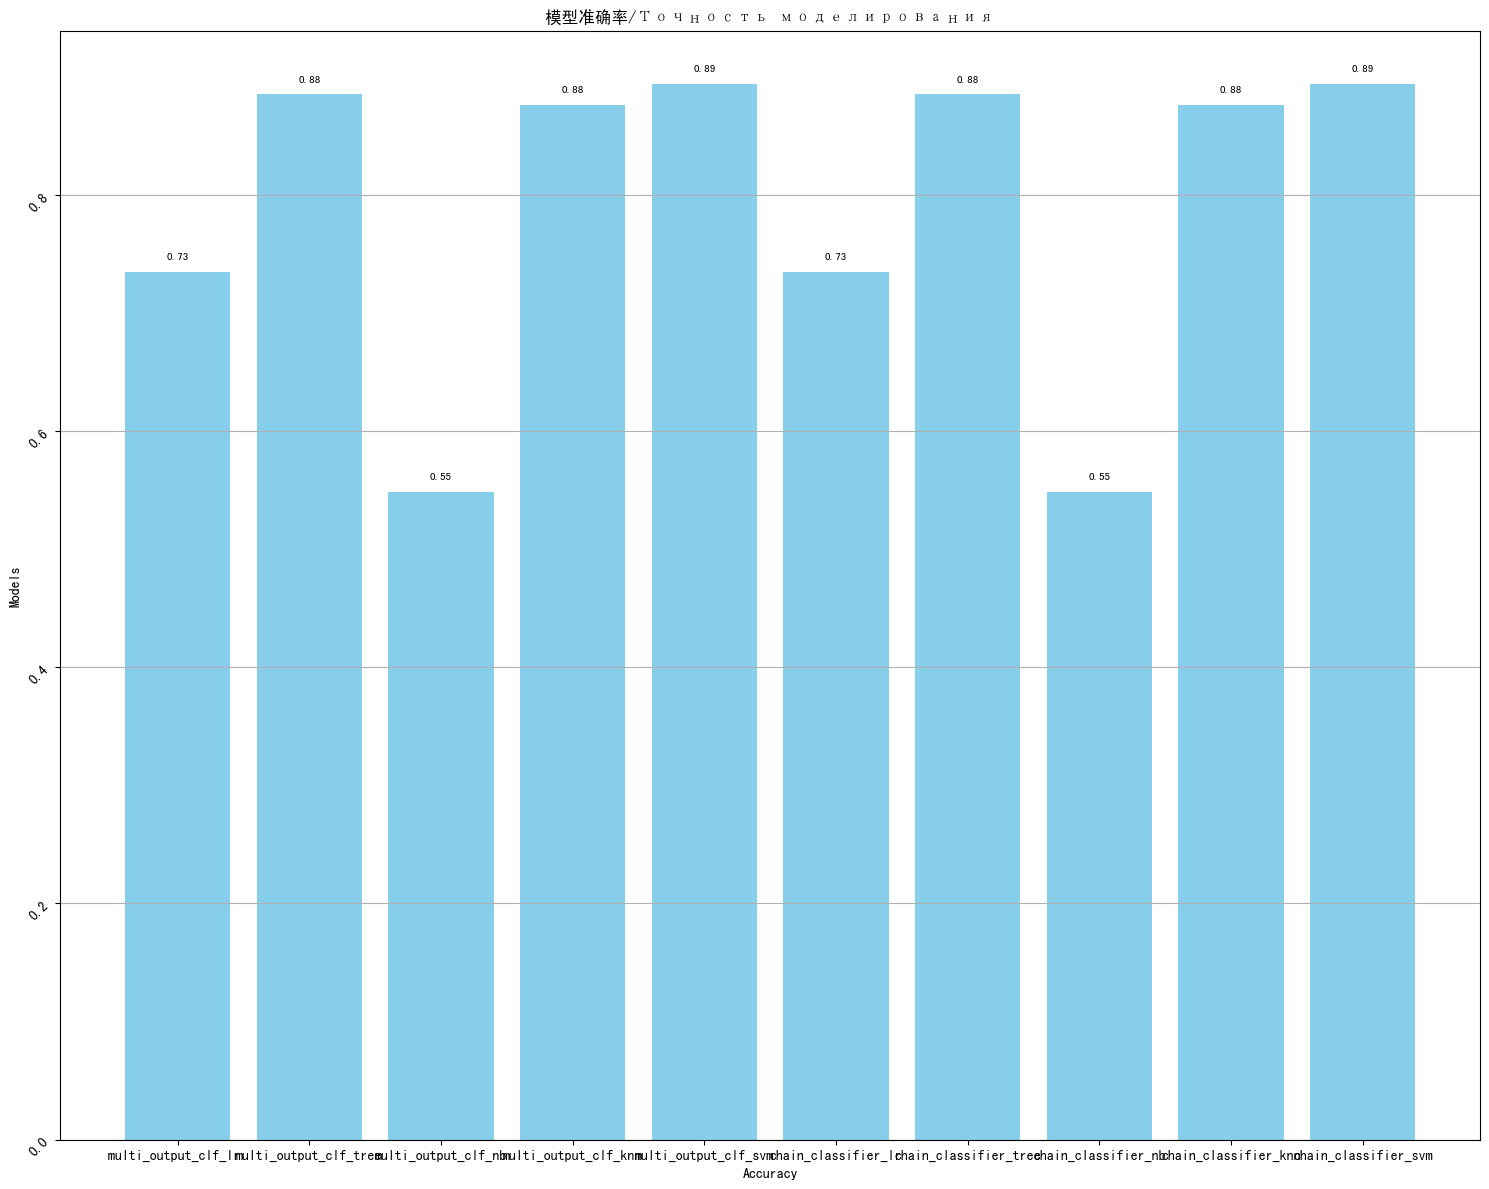

In [117]:
model_names = list(accuracies_new.keys())
accuracy_values = list(accuracies_new.values())

plt.figure(figsize=(15, 12))
plt.title('模型准确率/Точность моделирования')
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.yticks(rotation=45)
plt.bar(model_names, accuracy_values, color='skyblue')
plt.grid(axis='y')

for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

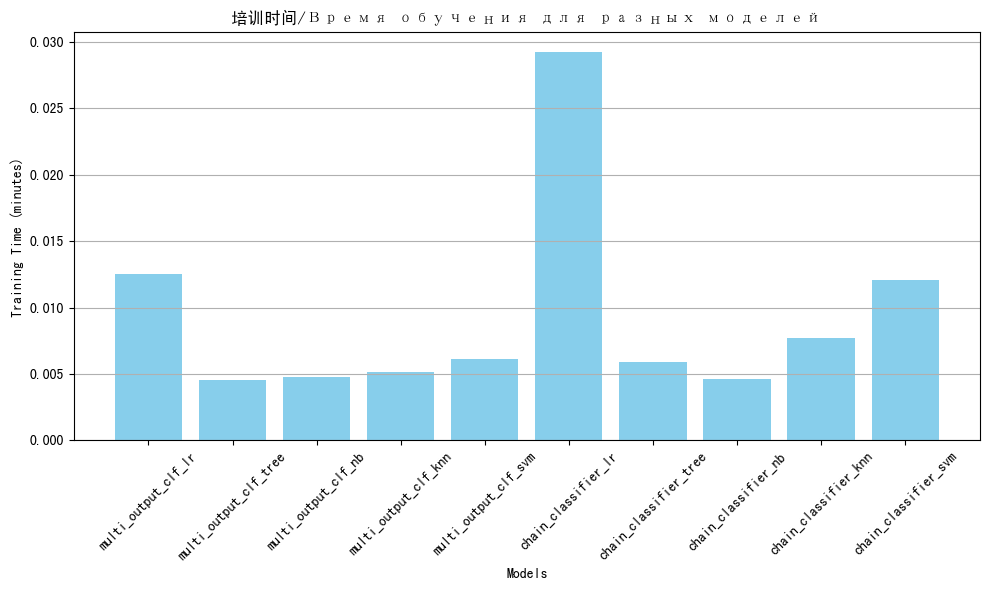

In [118]:
model_names = list(time_new.keys())
training_times = list(time_new.values())

plt.figure(figsize=(10, 6))
plt.title('培训时间/Время обучения для разных моделей')
plt.xlabel('Models')
plt.ylabel('Training Time (minutes)')
plt.xticks(rotation=45)
plt.bar(model_names, training_times, color='skyblue')
plt.grid(axis='y')

for i, v in enumerate(training_times):
    plt.text(i, v + 1, str(), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [119]:
base_regressor = Ridge(random_state=42)


multi_output_reg = MultiOutputRegressor(base_regressor)


multi_output_reg.fit(train_data, train_target)


predictions = multi_output_reg.predict(test_data)
time =cross_validate(base_regressor, train_data, train_target, cv=5)["fit_time"].mean()

r2 = r2_score(test_target, predictions, multioutput='variance_weighted')
print(f"R2 Score: {r2}")
print(time)

R2 Score: 0.7691106369043645
0.014198875427246094


In [120]:
ridge_regressor = Ridge(alpha=1.0)

chain_regressor = RegressorChain(ridge_regressor)


chain_regressor.fit(train_data, train_target)


predictions = chain_regressor.predict(test_data)
time =cross_validate(base_regressor, train_data, train_target, cv=5)["fit_time"].mean()

r2 = r2_score(test_target, predictions)
print(f"R2 Score: {r2}")
print(time)

R2 Score: 0.7691106369043645
0.014214038848876953


# **вывод**

Стратегия OneVsOne имеет самую высокую точность среди всех моделей.
Стратегия OutputCode имеет самую низкую точность среди всех моделей.
Стратегия OneVsOne имеет наименьшее время выполнения среди всех моделей.
Стратегия OutputCode имеет самое длительное время выполнения среди всех моделей.
Также MultiOutputClassifier и ClassifierChain Plain Bayes являются очень неточными.
Наилучшие результаты по точности и времени показала библиотечная реализация KNN.
Среди всех моделей наихудшие результаты по точности и времени показала библиотечная реализация простого метода Байеса.
